**1. Simple Plot**

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def reaction(i1, i2, i3, K1, K2, dt, T):
    C1_values, C2_values, C3_values, time_values = [i1], [i2], [i3], [0]           #arrays to store concentrations and time
    t = 0
    while t < T:                                                                   #Simulation loop
        # concentration difference calculated using differential equations given by the question
        dC1_dt = K2 * C3_values[-1] - K1 * C1_values[-1] * C2_values[-1]
        dC2_dt = K2 * C3_values[-1] - K1 * C1_values[-1] * C2_values[-1]
        dC3_dt = 2 * K1 * C1_values[-1] * C2_values[-1] - 2 * K2 * C3_values[-1]

        #Update the concentration
        C1_new = C1_values[-1] + dC1_dt * dt
        C2_new = C2_values[-1] + dC2_dt * dt
        C3_new = C3_values[-1] + dC3_dt * dt

        # Append the arrays
        C1_values.append(C1_new)
        C2_values.append(C2_new)
        C3_values.append(C3_new)
        t += dt
        time_values.append(t)

    return time_values, C1_values, C2_values, C3_values

In [7]:
i1, i2, i3 = 6,5,1
K1, K2 = 0.1,0.2
dt = 0.1
T = 4

In [8]:
time, C1, C2, C3 = reaction(i1,i2,i3,K1,K2,dt,T)

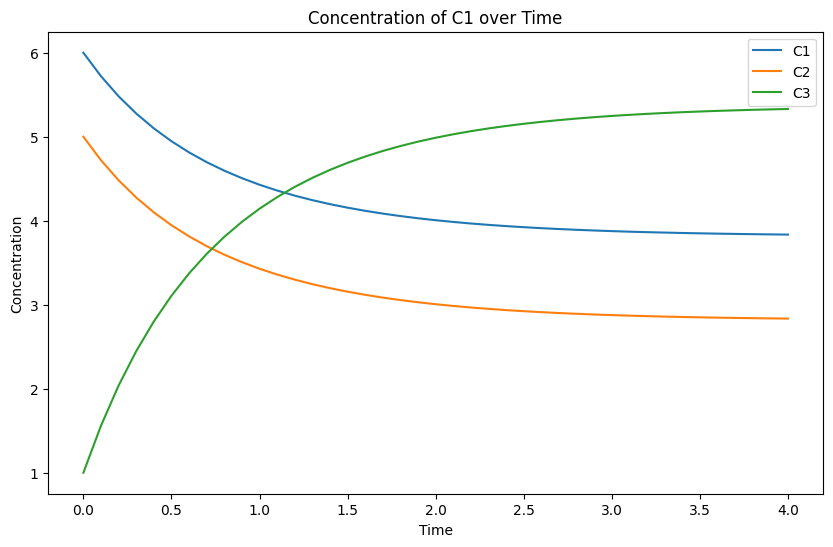

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(time, C1, label='C1')
plt.plot(time, C2, label='C2')
plt.plot(time, C3, label='C3')
plt.title('Concentration of C1 over Time')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()

**2. Interactive Plot**

In [13]:
!pip install ipywidgets

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider

In [17]:
def simulate_reaction(initial_conditions, rate_constants, simulation_time, time_step):
    c1, c2, c3 = initial_conditions
    k1, k2, k3 = rate_constants
    time_values = [0]
    c1_values = [c1]
    c2_values = [c2]
    c3_values = [c3]

    while time_values[-1] < simulation_time:
        dc1 = k2 * c3 - k1 * c1 * c2
        dc2 = k2 * c3 - k1 * c1 * c2
        dc3 = 2 * k1 * c1 * c2 - 2 * k2 * c3
        c1 += dc1 * time_step
        c2 += dc2 * time_step
        c3 += dc3 * time_step
        time_values.append(time_values[-1] + time_step)
        c1_values.append(c1)
        c2_values.append(c2)
        c3_values.append(c3)

    return time_values, c1_values, c2_values, c3_values

In [18]:
def plot_reaction_interactive(c1=1, c2=2, c3=3, k1=0.07, k2=0.01, k3=1):
    initial_conditions = [c1, c2, c3]
    rate_constants = [k1, k2, k3]
    simulation_time = 10
    time_step = 0.1

    time, amount_c1, amount_c2, amount_c3 = simulate_reaction(
        initial_conditions, rate_constants, simulation_time, time_step
    )

    plt.figure(figsize=(10, 6))
    plt.plot(time, amount_c1, label='c1', color='red', marker="*")
    plt.plot(time, amount_c2, label='c2', color='blue', marker="+")
    plt.plot(time, amount_c3, label='c3', color='green', marker="o")
    plt.xlabel('Time')
    plt.ylabel('Amount')
    plt.title('Amount of reactants during a chemical reaction')
    plt.legend()
    plt.grid(True)
    plt.show()

In [19]:
interact(plot_reaction_interactive,
         c1=FloatSlider(min=0, max=5, step=0.1, value=1),
         c2=FloatSlider(min=0, max=5, step=0.1, value=2),
         c3=FloatSlider(min=0, max=5, step=0.1, value=3),
         k1=FloatSlider(min=0, max=1, step=0.01, value=0.07),
         k2=FloatSlider(min=0, max=1, step=0.01, value=0.01),
         k3=FloatSlider(min=0, max=1, step=0.1, value=1))


interactive(children=(FloatSlider(value=1.0, description='c1', max=5.0), FloatSlider(value=2.0, description='câ€¦

<function __main__.plot_reaction_interactive(c1=1, c2=2, c3=3, k1=0.07, k2=0.01, k3=1)>